In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
root_dir = "./"
results_dir = os.path.join(root_dir, "results")

# Alternatives are:
# "synthetic-unet", "synthetic-unetr", "synthetic-atunet"
data_to_view = "synthetic-unet"

In [3]:
data_96_1 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-96-1.csv"))
data_96_1["Image_size"] = [96] * 100
data_96_2 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-96-2.csv"))
data_96_2["Image_size"] = [96] * 100
data_96_3 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-96-3.csv"))
data_96_3["Image_size"] = [96] * 100

data_80_1 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-80-1.csv"))
data_80_1["Image_size"] = [80] * 100
data_80_2 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-80-2.csv"))
data_80_2["Image_size"] = [80] * 100
data_80_3 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-80-3.csv"))
data_80_3["Image_size"] = [80] * 100

data_64_1 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-64-1.csv"))
data_64_1["Image_size"] = [64] * 100
data_64_2 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-64-2.csv"))
data_64_2["Image_size"] = [64] * 100
data_64_3 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-64-3.csv"))
data_64_3["Image_size"] = [64] * 100

data_48_1 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-48-1.csv"))
data_48_1["Image_size"] = [48] * 100
data_48_2 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-48-2.csv"))
data_48_2["Image_size"] = [48] * 100
data_48_3 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-48-3.csv"))
data_48_3["Image_size"] = [48] * 100

data_32_1 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-32-1.csv"))
data_32_1["Image_size"] = [32] * 100
data_32_2 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-32-2.csv"))
data_32_2["Image_size"] = [32] * 100
data_32_3 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-32-3.csv"))
data_32_3["Image_size"] = [32] * 100

combined_frames = [data_96_1, data_96_2, data_96_3, \
                   data_80_1, data_80_2, data_80_3, \
                   data_64_1, data_64_2, data_64_3, \
                   data_48_1, data_48_2, data_48_3, \
                   data_32_1, data_32_2, data_32_3]

combined_df = pd.concat(combined_frames)
combined_df.rename(columns={'Image_size': 'PatchSize'}, inplace=True)

combined_df["fg_group"] = pd.cut(combined_df['fg_ratio'], 
                                 bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5], 
                                 labels=["0", "0.1", "0.2", "0.3",  "0.4"],
                                 include_lowest=True)


visualize_df = combined_df.loc[(combined_df['PatchSize'] == 96) | (combined_df['PatchSize'] == 64) | (combined_df['PatchSize'] == 32)]

In [4]:
fg_ratio_32 = pd.read_csv(os.path.join(results_dir, data_to_view, "foreground_ratios-32.csv"))
fg_ratio_48 = pd.read_csv(os.path.join(results_dir, data_to_view, "foreground_ratios-48.csv"))
fg_ratio_64 = pd.read_csv(os.path.join(results_dir, data_to_view, "foreground_ratios-64.csv"))
fg_ratio_80 = pd.read_csv(os.path.join(results_dir, data_to_view, "foreground_ratios-80.csv"))
fg_ratio_96 = pd.read_csv(os.path.join(results_dir, data_to_view, "foreground_ratios-96.csv"))

In [5]:
selected_dice_96 = []
selected_dice_80 = []
selected_dice_64 = []
selected_dice_48 = []
selected_dice_32 = []

for index in range(len(combined_df)):
   row = combined_df.iloc[index]
   if row["PatchSize"] == 96:
      if (row["fg_ratio"] > fg_ratio_96.min()[0]) and (row["fg_ratio"] < fg_ratio_96.max()[0]):
         selected_dice_96.append(row["dsc"])
   elif row["PatchSize"] == 80:
      if (row["fg_ratio"] > fg_ratio_80.min()[0]) and (row["fg_ratio"] < fg_ratio_80.max()[0]):
         selected_dice_80.append(row["dsc"])
   elif row["PatchSize"] == 64:
      if (row["fg_ratio"] > fg_ratio_64.min()[0]) and (row["fg_ratio"] < fg_ratio_64.max()[0]):
         selected_dice_64.append(row["dsc"])
   elif row["PatchSize"] == 48:
      if (row["fg_ratio"] > fg_ratio_48.min()[0]) and (row["fg_ratio"] < fg_ratio_48.max()[0]):
         selected_dice_48.append(row["dsc"])
   elif row["PatchSize"] == 32:
      if (row["fg_ratio"] > fg_ratio_32.min()[0]) and (row["fg_ratio"] < fg_ratio_32.max()[0]):
         selected_dice_32.append(row["dsc"])

mean_within_dice_96 = np.nanmean(selected_dice_96)
mean_within_dice_80 = np.nanmean(selected_dice_80)
mean_within_dice_64 = np.nanmean(selected_dice_64)
mean_within_dice_48 = np.nanmean(selected_dice_48)
mean_within_dice_32 = np.nanmean(selected_dice_32)

std_within_dice_96 = np.nanstd(selected_dice_96)
std_within_dice_80 = np.nanstd(selected_dice_80)
std_within_dice_64 = np.nanstd(selected_dice_64)
std_within_dice_48 = np.nanstd(selected_dice_48)
std_within_dice_32 = np.nanstd(selected_dice_32)

print("Dice 96 within:", mean_within_dice_96, " sd: (", std_within_dice_96, ")")
print("Dice 80 within:", mean_within_dice_80, " sd: (", std_within_dice_80, ")")
print("Dice 64 within:", mean_within_dice_64, " sd: (", std_within_dice_64, ")")
print("Dice 48 within:", mean_within_dice_48, " sd: (", std_within_dice_48, ")")
print("Dice 32 within:", mean_within_dice_32, " sd: (", std_within_dice_32, ")")

Dice 96 within: 0.993740370460585  sd: ( 0.0009419837064871169 )
Dice 80 within: 0.994359876960516  sd: ( 0.001040803281370546 )
Dice 64 within: 0.9944278970360756  sd: ( 0.0016153226855418568 )
Dice 48 within: 0.9862585733334224  sd: ( 0.016030006146231957 )
Dice 32 within: 0.9815814703702926  sd: ( 0.024007304800095337 )


In [6]:
selected_dice_96 = []
selected_dice_80 = []
selected_dice_64 = []
selected_dice_48 = []
selected_dice_32 = []

for index in range(len(combined_df)):
   row = combined_df.iloc[index]
   if row["PatchSize"] == 96:
      if (row["fg_ratio"] <= fg_ratio_96.min()[0]) or (row["fg_ratio"] >= fg_ratio_96.max()[0]):
         selected_dice_96.append(row["dsc"])
   elif row["PatchSize"] == 80:
      if (row["fg_ratio"] <= fg_ratio_80.min()[0]) or (row["fg_ratio"] >= fg_ratio_80.max()[0]):
         selected_dice_80.append(row["dsc"])
   elif row["PatchSize"] == 64:
      if (row["fg_ratio"] <= fg_ratio_64.min()[0]) or (row["fg_ratio"] >= fg_ratio_64.max()[0]):
         selected_dice_64.append(row["dsc"])
   elif row["PatchSize"] == 48:
      if (row["fg_ratio"] <= fg_ratio_48.min()[0]) or (row["fg_ratio"] >= fg_ratio_48.max()[0]):
         selected_dice_48.append(row["dsc"])
   elif row["PatchSize"] == 32:
      if (row["fg_ratio"] <= fg_ratio_32.min()[0]) or (row["fg_ratio"] >= fg_ratio_32.max()[0]):
         selected_dice_32.append(row["dsc"])

mean_outside_dice_96 = np.nanmean(selected_dice_96)
mean_outside_dice_80 = np.nanmean(selected_dice_80)
mean_outside_dice_64 = np.nanmean(selected_dice_64)
mean_outside_dice_48 = np.nanmean(selected_dice_48)
mean_outside_dice_32 = np.nanmean(selected_dice_32)

std_outside_dice_96 = np.nanstd(selected_dice_96)
std_outside_dice_80 = np.nanstd(selected_dice_80)
std_outside_dice_64 = np.nanstd(selected_dice_64)
std_outside_dice_48 = np.nanstd(selected_dice_48)
std_outside_dice_32 = np.nanstd(selected_dice_32)

print("Dice 96 outside drop:", mean_within_dice_96 - mean_outside_dice_96, " sd: (", std_outside_dice_96, ")")
print("Dice 80 outside drop:", mean_within_dice_80 - mean_outside_dice_80, " sd: (", std_outside_dice_80, ")")
print("Dice 64 outside drop:", mean_within_dice_64 - mean_outside_dice_64, " sd: (", std_outside_dice_64, ")")
print("Dice 48 outside drop:", mean_within_dice_48 - mean_outside_dice_48, " sd: (", std_outside_dice_48, ")")
print("Dice 32 outside drop:", mean_within_dice_32 - mean_outside_dice_32, " sd: (", std_outside_dice_32, ")")

Dice 96 outside drop: 0.01787998588716566  sd: ( 0.028860070490132617 )
Dice 80 outside drop: 0.013925773621189852  sd: ( 0.020523390828708403 )
Dice 64 outside drop: 0.023468907177448317  sd: ( 0.024705444865928884 )
Dice 48 outside drop: nan  sd: ( nan )
Dice 32 outside drop: nan  sd: ( nan )


/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_38025/1084939695.py:28: RuntimeWarning: Mean of empty slice
  mean_outside_dice_48 = np.nanmean(selected_dice_48)
/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_38025/1084939695.py:29: RuntimeWarning: Mean of empty slice
  mean_outside_dice_32 = np.nanmean(selected_dice_32)
/Users/amithkamath/opt/anaconda3/envs/geomvar-env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [7]:
selected_hd_96 = []
selected_hd_80 = []
selected_hd_64 = []
selected_hd_48 = []
selected_hd_32 = []

for index in range(len(combined_df)):
   row = combined_df.iloc[index]
   if row["PatchSize"] == 96:
      if (row["fg_ratio"] > fg_ratio_96.min()[0]) and (row["fg_ratio"] < fg_ratio_96.max()[0]):
         selected_hd_96.append(row["hausdorff"])
   elif row["PatchSize"] == 80:
      if (row["fg_ratio"] > fg_ratio_80.min()[0]) and (row["fg_ratio"] < fg_ratio_80.max()[0]):
         selected_hd_80.append(row["hausdorff"])
   elif row["PatchSize"] == 64:
      if (row["fg_ratio"] > fg_ratio_64.min()[0]) and (row["fg_ratio"] < fg_ratio_64.max()[0]):
         selected_hd_64.append(row["hausdorff"])
   elif row["PatchSize"] == 48:
      if (row["fg_ratio"] > fg_ratio_48.min()[0]) and (row["fg_ratio"] < fg_ratio_48.max()[0]):
         selected_hd_48.append(row["hausdorff"])
   elif row["PatchSize"] == 32:
      if (row["fg_ratio"] > fg_ratio_32.min()[0]) and (row["fg_ratio"] < fg_ratio_32.max()[0]):
         selected_hd_32.append(row["hausdorff"])

mean_within_hd_96 = np.nanmean(selected_hd_96)
mean_within_hd_80 = np.nanmean(selected_hd_80)
mean_within_hd_64 = np.nanmean(selected_hd_64)
mean_within_hd_48 = np.nanmean(selected_hd_48)
mean_within_hd_32 = np.nanmean(selected_hd_32)

std_within_hd_96 = np.nanstd(selected_hd_96)
std_within_hd_80 = np.nanstd(selected_hd_80)
std_within_hd_64 = np.nanstd(selected_hd_64)
std_within_hd_48 = np.nanstd(selected_hd_48)
std_within_hd_32 = np.nanstd(selected_hd_32)

print("HD 96 within:", mean_within_hd_96, " sd: (", std_within_hd_96, ")")
print("HD 80 within:", mean_within_hd_80, " sd: (", std_within_hd_80, ")")
print("HD 64 within:", mean_within_hd_64, " sd: (", std_within_hd_64, ")")
print("HD 48 within:", mean_within_hd_48, " sd: (", std_within_hd_48, ")")
print("HD 32 within:", mean_within_hd_32, " sd: (", std_within_hd_32, ")")

HD 96 within: 1.0081218345563352  sd: ( 0.05743004290459855 )
HD 80 within: 1.0378286015018807  sd: ( 0.12908057136784998 )
HD 64 within: 1.0410830161197422  sd: ( 0.14541717074341903 )
HD 48 within: 1.0676824068290123  sd: ( 0.1916270983302572 )
HD 32 within: 20.313847423670605  sd: ( 31.52772752432105 )


In [8]:
selected_hd_96 = []
selected_hd_80 = []
selected_hd_64 = []
selected_hd_48 = []
selected_hd_32 = []

for index in range(len(combined_df)):
   row = combined_df.iloc[index]
   if row["PatchSize"] == 96:
      if (row["fg_ratio"] <= fg_ratio_96.min()[0]) or (row["fg_ratio"] >= fg_ratio_96.max()[0]):
         selected_hd_96.append(row["hausdorff"])
   elif row["PatchSize"] == 80:
      if (row["fg_ratio"] <= fg_ratio_80.min()[0]) or (row["fg_ratio"] >= fg_ratio_80.max()[0]):
         selected_hd_80.append(row["hausdorff"])
   elif row["PatchSize"] == 64:
      if (row["fg_ratio"] <= fg_ratio_64.min()[0]) or (row["fg_ratio"] >= fg_ratio_64.max()[0]):
         selected_hd_64.append(row["hausdorff"])
   elif row["PatchSize"] == 48:
      if (row["fg_ratio"] <= fg_ratio_48.min()[0]) or (row["fg_ratio"] >= fg_ratio_48.max()[0]):
         selected_hd_48.append(row["hausdorff"])
   elif row["PatchSize"] == 32:
      if (row["fg_ratio"] <= fg_ratio_32.min()[0]) or (row["fg_ratio"] >= fg_ratio_32.max()[0]):
         selected_hd_32.append(row["hausdorff"])

mean_outside_hd_96 = np.nanmean(selected_hd_96)
mean_outside_hd_80 = np.nanmean(selected_hd_80)
mean_outside_hd_64 = np.nanmean(selected_hd_64)
mean_outside_hd_48 = np.nanmean(selected_hd_48)
mean_outside_hd_32 = np.nanmean(selected_hd_32)

std_outside_hd_96 = np.nanstd(selected_hd_96)
std_outside_hd_80 = np.nanstd(selected_hd_80)
std_outside_hd_64 = np.nanstd(selected_hd_64)
std_outside_hd_48 = np.nanstd(selected_hd_48)
std_outside_hd_32 = np.nanstd(selected_hd_32)

print("HD 96 outside:", mean_outside_hd_96, " sd: (", std_outside_hd_96, ")")
print("HD 80 outside:", mean_outside_hd_80, " sd: (", std_outside_hd_80, ")")
print("HD 64 outside:", mean_outside_hd_64, " sd: (", std_outside_hd_64, ")")
print("HD 48 outside:", mean_outside_hd_48, " sd: (", std_outside_hd_48, ")")
print("HD 32 outside:", mean_outside_hd_32, " sd: (", std_outside_hd_32, ")")

HD 96 outside: 1.0794613440832581  sd: ( 0.1659345984637183 )
HD 80 outside: 1.0908146224349127  sd: ( 0.21311400031259772 )
HD 64 outside: 1.0653104068079222  sd: ( 0.15847314329797202 )
HD 48 outside: nan  sd: ( nan )
HD 32 outside: nan  sd: ( nan )


/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_38025/2052361402.py:28: RuntimeWarning: Mean of empty slice
  mean_outside_hd_48 = np.nanmean(selected_hd_48)
/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_38025/2052361402.py:29: RuntimeWarning: Mean of empty slice
  mean_outside_hd_32 = np.nanmean(selected_hd_32)


Text(0.5, 1.0, 'synthetic-unet (Synthetic task)')

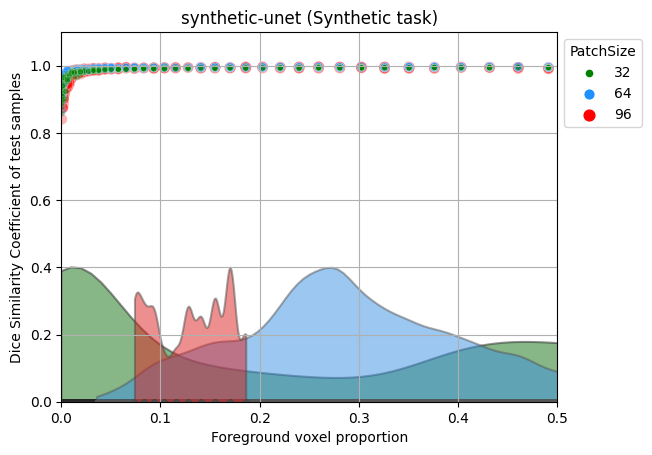

In [9]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax, cut=0, data=fg_ratio_32, palette=["green"], inner="points", orient="h")
sns.violinplot(ax=ax, cut=0, data=fg_ratio_64, palette=["dodgerblue"], inner="points", orient="h")
sns.violinplot(ax=ax, cut=0, data=fg_ratio_96, palette=["red"], inner="points", orient="h")
plt.setp(ax.collections, alpha=.5)

#sns.boxplot(ax=ax, data=visualize_df, x="fg_group", y="dsc", hue="PatchSize",
#                palette=['green','dodgerblue','red'])
#sns.scatterplot(ax=ax, data=visualize_df, x="fg_group", y="dsc", hue="PatchSize", alpha=0.3,
#                palette=['green','dodgerblue','red'], size="PatchSize", sizes=[30, 50, 70])

sns.scatterplot(ax=ax, data=visualize_df, x="fg_ratio", y="dsc", hue="PatchSize", alpha=0.3, 
                palette=['green','dodgerblue','red'], size="PatchSize", sizes=[20, 40, 60])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) 

plt.grid()
plt.ylim([0.0, 1.1])
plt.xlim([0.0, 0.5])
locs, labels = plt.yticks()  # Get the current locations and labels.
plt.yticks(np.arange(0, 1.2, step=0.2), labels=["0.0", "0.2", "0.4", "0.6", "0.8", "1.0"])  # Set label locations.
plt.xlabel("Foreground voxel proportion")
plt.ylabel("Dice Similarity Coefficient of test samples")
plt.title(data_to_view + " (Synthetic task)")

/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_38025/2759947286.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visualize_df["hausdorff"] = visualize_df["hausdorff"].div(160.0)


Text(0.5, 1.0, 'synthetic-unet (Synthetic task)')

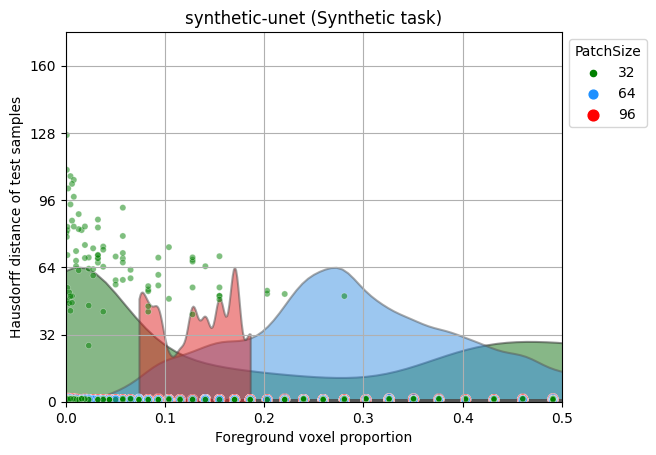

In [10]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax, cut=0, data=fg_ratio_32, palette=["green"], inner="points", orient="h")
sns.violinplot(ax=ax, cut=0, data=fg_ratio_64, palette=["dodgerblue"], inner="points", orient="h")
sns.violinplot(ax=ax, cut=0, data=fg_ratio_96, palette=["red"], inner="points", orient="h")
plt.setp(ax.collections, alpha=.5)

#sns.boxplot(ax=ax, data=visualize_df, x="fg_group", y="dsc", hue="PatchSize",
#                palette=['green','dodgerblue','red'])
#sns.scatterplot(ax=ax, data=visualize_df, x="fg_group", y="dsc", hue="PatchSize", alpha=0.3,
#                palette=['green','dodgerblue','red'], size="PatchSize", sizes=[30, 50, 70])
visualize_df["hausdorff"] = visualize_df["hausdorff"].div(160.0)
sns.scatterplot(ax=ax, data=visualize_df, x="fg_ratio", y="hausdorff", hue="PatchSize", alpha=0.5, 
                palette=['green','dodgerblue','red'], size="PatchSize", sizes=[20, 40, 60])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) 

plt.grid()
plt.ylim([0.0, 1.1])
plt.xlim([0.0, 0.5])
locs, labels = plt.yticks()  # Get the current locations and labels.
plt.yticks(np.arange(0, 1.2, step=0.2), labels=["0", "32", "64", "96", "128", "160"])  # Set label locations.
plt.xlabel("Foreground voxel proportion")
plt.ylabel("Hausdorff distance of test samples")
plt.title(data_to_view + " (Synthetic task)")

Text(0.5, 1.0, 'synthetic-unet')

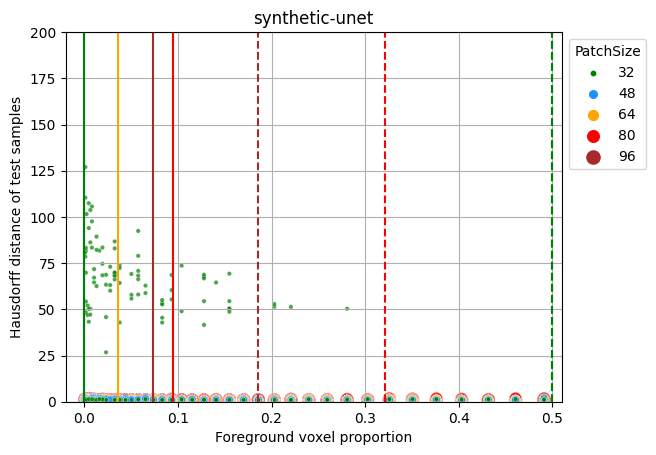

In [11]:
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, data=combined_df, x="fg_ratio", y="hausdorff", hue="PatchSize", alpha=0.7, 
                palette=['green','dodgerblue','orange','red','brown'], size="PatchSize", sizes=[10, 30, 50, 70, 90])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) 

plt.axvline(x=np.max([fg_ratio_96.min()[0], 0.0]), ymin=0.0, ymax=1.0, color='brown')
plt.axvline(x=np.min([fg_ratio_96.max()[0], 0.5]), ymin=0.0, ymax=1.0, color='brown', linestyle='dashed')

plt.axvline(x=np.max([fg_ratio_80.min()[0], 0.0]), ymin=0.0, ymax=1.0, color='red')
plt.axvline(x=np.min([fg_ratio_80.max()[0], 0.5]), ymin=0.0, ymax=1.0, color='red', linestyle='dashed')

plt.axvline(x=np.max([fg_ratio_64.min()[0], 0.0]), ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x=np.min([fg_ratio_64.max()[0], 0.5]), ymin=0.0, ymax=1.0, color='orange', linestyle='dashed')

plt.axvline(x=np.max([fg_ratio_48.min()[0], 0.0]), ymin=0.0, ymax=1.0, color='dodgerblue')
plt.axvline(x=np.min([fg_ratio_48.max()[0], 0.5]), ymin=0.0, ymax=1.0, color='dodgerblue', linestyle='dashed')

plt.axvline(x=np.max([fg_ratio_32.min()[0], 0.0]), ymin=0.0, ymax=1.0, color='green')
plt.axvline(x=np.min([fg_ratio_32.max()[0], 0.5]), ymin=0.0, ymax=1.0, color='green', linestyle='dashed')

plt.grid()
plt.ylim([0.0, 200.0])
plt.xlim([-0.02, 0.51])
plt.xlabel("Foreground voxel proportion")
plt.ylabel("Hausdorff distance of test samples")
plt.title(data_to_view)